# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

# Load Dataset and Explore the data

In [3]:
df=pd.read_csv("D:\\credit_card\\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [9]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
null_columns=pd.DataFrame({'Columns':df.isna().sum().index,'No. Null values':df.isna().sum().values,'Percentage':df.isna().sum().values/df.shape[0]})

In [11]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [12]:
df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

# Percentage of total not fraud transaction

In [13]:
nfcount=0
notfraud=df['Class']
for i in range(len(notfraud)):
    if notfraud[i]==0:
        nfcount=nfcount+1
nfcount
per_nf=(nfcount/len(notfraud))*100
print('Percentage of total not fraud transaction in the dataset:' ,per_nf)

Percentage of total not fraud transaction in the dataset: 99.82725143693798


In [14]:
len(notfraud)

284807

# Percentage of total fraud transaction

In [15]:
fcount=0
fraud=df['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        fcount=fcount+1
fcount
per_f=(fcount/len(fraud))*100
print('Percentage of total fraud transaction in the dataset:',per_f)

Percentage of total fraud transaction in the dataset: 0.1727485630620034


In [16]:
len(fraud)

284807

In [17]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=fraud
plot_data['Genuine Transaction']=notfraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


# Plot the ratio Genuine transactions are higher than fraud transactions

<Axes: title={'center': 'Bar plot for Fraud vs Genuine transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

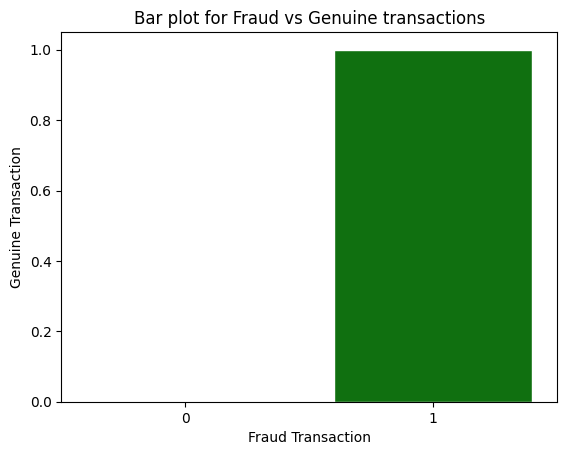

In [18]:
plt.title("Bar plot for Fraud vs Genuine transactions")
sns.barplot(x='Fraud Transaction', y='Genuine Transaction', data=plot_data, color='Green',edgecolor='w')

# Plot the relation between Time and the Amount

Text(0.5, 1.0, 'Time vs Amount')

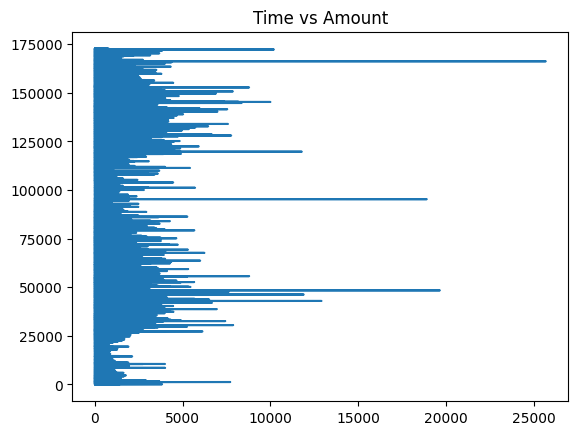

In [19]:
x=df['Amount']
y=df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

# Plot Distplot using Amount

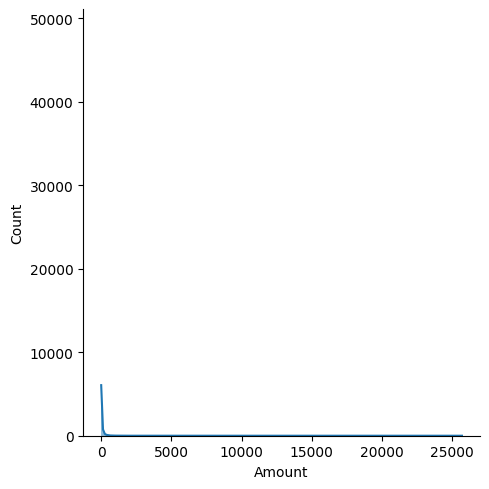

In [20]:
import seaborn as sns
sns.displot(df["Amount"], kde=True)  
plt.show()

C:\Users\pavi\AppData\Local\Temp\ipykernel_9928\1852983933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], color='red')


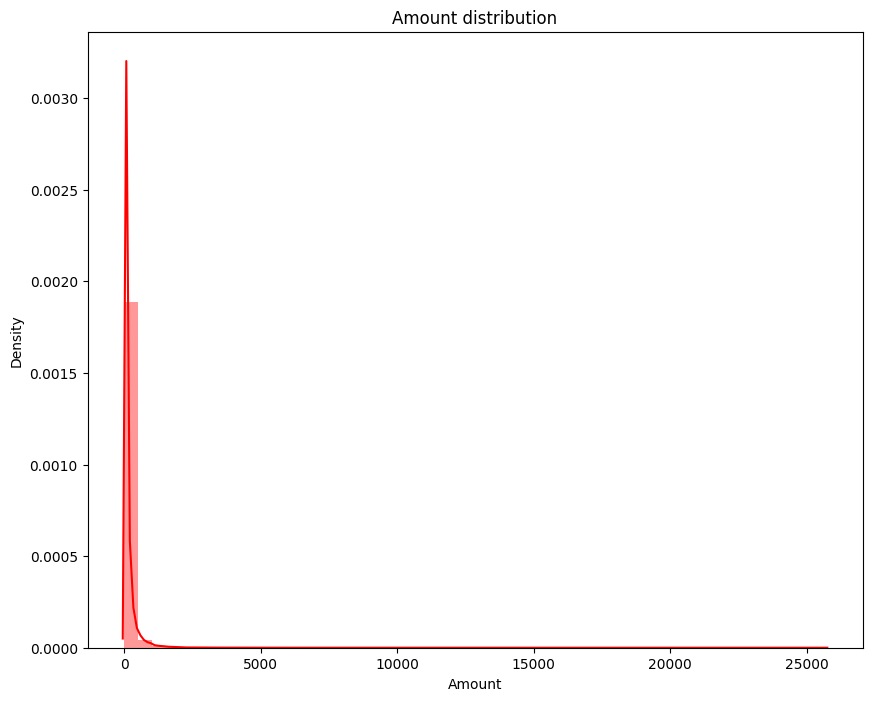

In [21]:
plt.figure(figsize=(10,8))
plt.title('Amount distribution')
sns.distplot(df['Amount'], color='red')
plt.show()

# Outliers

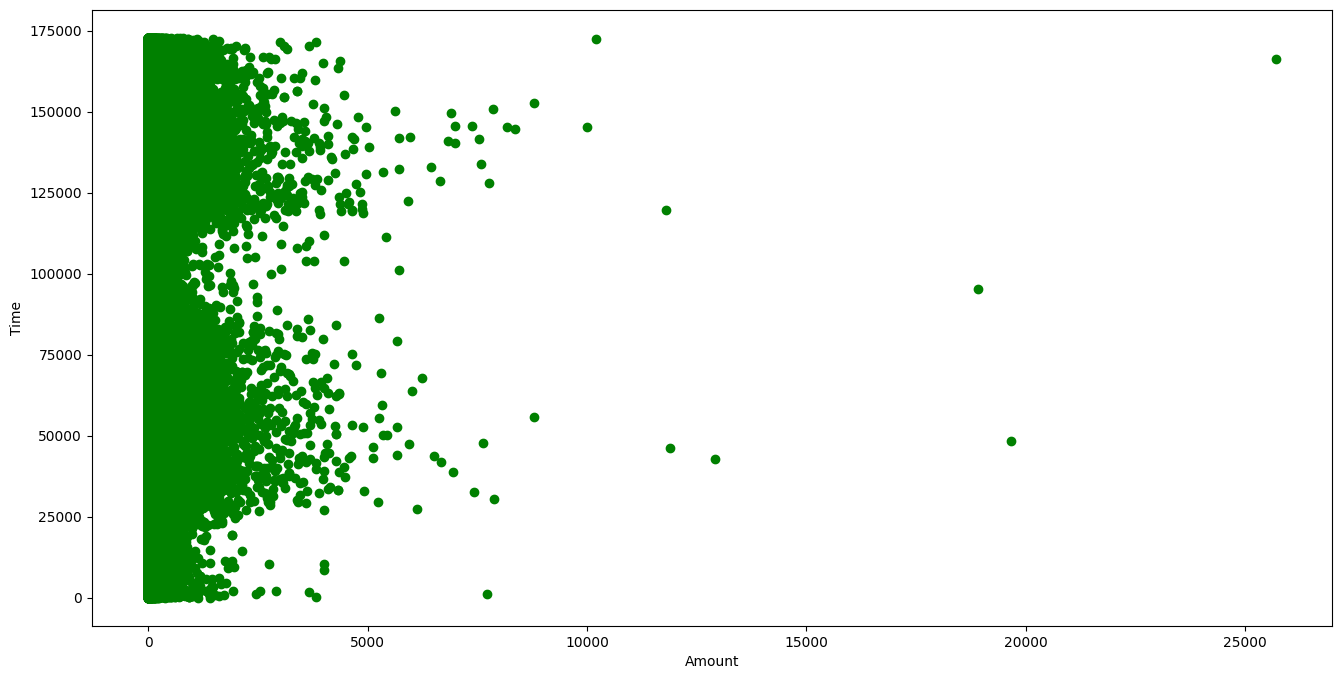

In [22]:
fig, ax=plt.subplots(figsize=(16,8))
ax.scatter(df['Amount'],df['Time'],color='green')
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

# Correlation

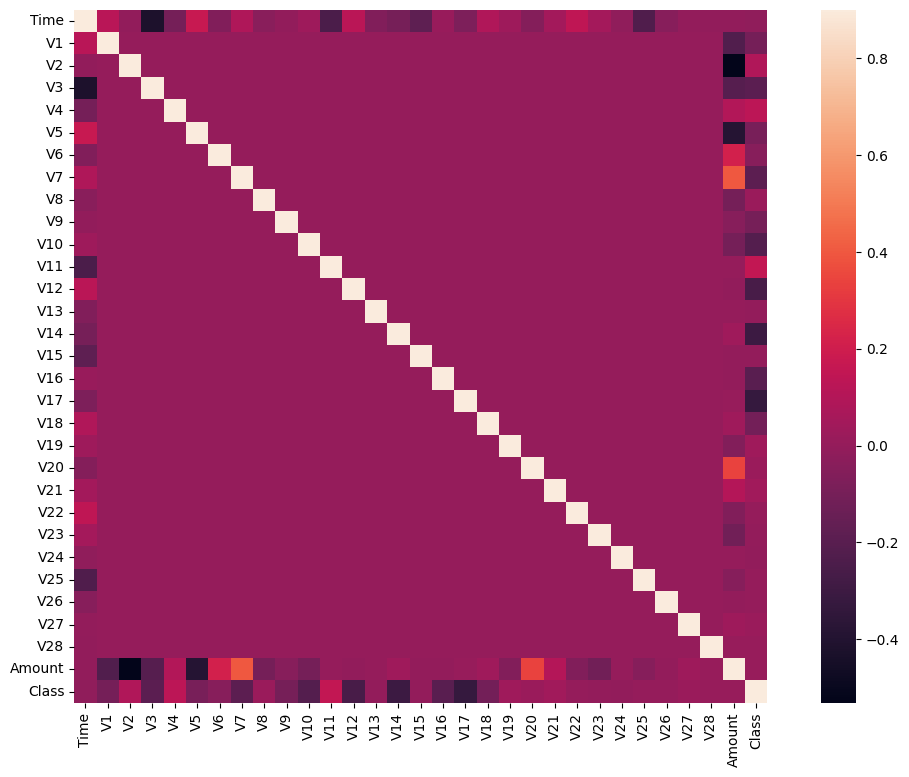

In [23]:
correlation_metrics=df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,vmax=0.9, square=True)
plt.show()

# Split the dataset into Train and Test

In [24]:
x=df.drop(['Class'],axis=1)
y=df['Class']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
xtrain.shape

(227845, 30)

In [26]:
xtest.shape

(56962, 30)

# Build the Linear Regression Model

In [27]:
logreg=LogisticRegression()

# Fit the Model

In [28]:
logreg.fit(xtrain,ytrain)

C:\Users\pavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predict on the Test data

In [29]:
y_pred=logreg.predict(xtest)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy Score

In [30]:
accuracy=logreg.score(xtest,ytest)
accuracy

0.9986306660580738

# Confusion Matrix

In [31]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56829    35]
 [   43    55]]


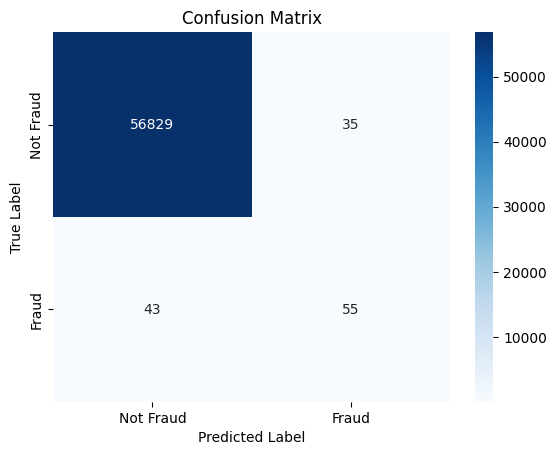

In [32]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy Calculation

In [33]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  99.86306660580738 %


# Classification Report

In [34]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



# Accuracy, Precision, Recall, F1 score

In [35]:
# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(ytest, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(ytest, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(ytest, y_pred)
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9986
Precision: 0.6111
Recall: 0.5612
F1 Score: 0.5851
